In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from itertools import combinations
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import re

In [2]:
# import complete CSV
df = pd.read_csv('data/dataset.csv')
# remove all non-alphabet characters and convert to lowercase letters
regex = re.compile('[^a-zA-Z]')
df['Body'] = df['Body'].apply(lambda post: regex.sub(' ', post).lower())
# remove spaces
df['Body'] = df['Body'].apply(lambda post: " ".join([word for word in post.split()]))
df

,Date,Title,Body,Nasdaq Value,Nasdaq Delta,Nasdaq Proportion,Dow Jones Value,Dow Jones Delta,Dow Jones Proportion,S&P 500 Value,S&P 500 Delta,S&P 500 Proportion
0,2017-04-06,Notice Regarding the Continuation of the Natio...,notice continuation of the national emergency ...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
1,2017-04-06,Message to the Congress Regarding the Continua...,to the congress of the united states section d...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
2,2017-04-06,1600 Daily: Everything White House for 4/6/17,summary get news events and updates from the w...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
3,2017-04-06,Vice President Mike Pence to Travel to the Rep...,washington dc vice president mike pence will t...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
4,2017-04-06,White House History: White House Easter Egg Roll,continuing the timeless tradition of the white...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
5,2017-04-06,Remarks by President Trump and Vice President ...,east room a m edtthe vice president to all the...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
6,2017-04-06,"Photo of the Day: April 6, 2017",president donald trump and king abdullah ii of...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827
7,2017-04-05,Readout of President Donald J. Trump’s Call wi...,president donald j trump spoke today with prim...,5864.479980,14.470215,0.002467,20648.150391,14.798828,0.000717,2352.949951,4.540039,0.001930
8,2017-04-05,Statement from the Press Secretary on Gold Sta...,on this day in nearing the end of world war ii...,5864.479980,14.470215,0.002467,20648.150391,14.798828,0.000717,2352.949951,4.540039,0.001930
9,2017-04-05,Memorandum: Implementing Executive Order 13771...,m memorandum for regulatory policy officers at...,5864.479980,14.470215,0.002467,20648.150391,14.798828,0.000717,2352.949951,4.540039,0.001930


In [3]:
df['Mean Proportion'] = (df['Nasdaq Proportion'] + df['Dow Jones Proportion'] + df['S&P 500 Proportion'])/3

In [4]:
n_samples = 20000
n_topics = 4
n_top_words = 25

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx + 1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
# Vectorize our text using CountVectorizer
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

tf = tf_vectorizer.fit_transform(df['Body'])

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=n_samples,
                                random_state=0)
#fit the model
lda.fit(tf)

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf features for LDA...
Fitting LDA models with tf features, n_samples=20000 and n_topics=4...

Topics in LDA model:

Topic #1:
order federal regulatory executive agency agencies actions regulations rule law action act cost state costs review states department agenda government regulation general information year director

Topic #2:
trump states united security house american law national secretary white donald vice minister mr prime economic administration america court office today leaders new americans countries

Topic #3:
going thank people great applause know just want mr country good right american like jobs really im think laughter lot years say time said job

Topic #4:
think mr going people just said know house question administration im want right look make dont white theres thats sure did say does time lot



In [5]:
topic_dist = lda.transform(tf)
topic_dist_df = pd.DataFrame(topic_dist)
df_w_topics = topic_dist_df.join(df)
df_w_topics

,0,1,2,3,Date,Title,Body,Nasdaq Value,Nasdaq Delta,Nasdaq Proportion,Dow Jones Value,Dow Jones Delta,Dow Jones Proportion,S&P 500 Value,S&P 500 Delta,S&P 500 Proportion,Mean Proportion
0,0.274324,0.717448,0.004049,0.004178,2017-04-06,Notice Regarding the Continuation of the Natio...,notice continuation of the national emergency ...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
1,0.221069,0.763802,0.007477,0.007651,2017-04-06,Message to the Congress Regarding the Continua...,to the congress of the united states section d...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
2,0.051654,0.844772,0.051348,0.052226,2017-04-06,1600 Daily: Everything White House for 4/6/17,summary get news events and updates from the w...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
3,0.002288,0.993145,0.002281,0.002286,2017-04-06,Vice President Mike Pence to Travel to the Rep...,washington dc vice president mike pence will t...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
4,0.021665,0.935372,0.021194,0.021768,2017-04-06,White House History: White House Easter Egg Roll,continuing the timeless tradition of the white...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
5,0.000987,0.156946,0.841061,0.001006,2017-04-06,Remarks by President Trump and Vice President ...,east room a m edtthe vice president to all the...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
6,0.021204,0.879085,0.022138,0.077573,2017-04-06,"Photo of the Day: April 6, 2017",president donald trump and king abdullah ii of...,5878.950195,-1.140136,-0.000194,20662.949219,-6.849610,-0.000331,2357.489990,-1.949951,-0.000827,-0.000451
7,0.008148,0.975173,0.008195,0.008484,2017-04-05,Readout of President Donald J. Trump’s Call wi...,president donald j trump spoke today with prim...,5864.479980,14.470215,0.002467,20648.150391,14.798828,0.000717,2352.949951,4.540039,0.001930,0.001705
8,0.009405,0.552839,0.428205,0.009551,2017-04-05,Statement from the Press Secretary on Gold Sta...,on this day in nearing the end of world war ii...,5864.479980,14.470215,0.002467,20648.150391,14.798828,0.000717,2352.949951,4.540039,0.001930,0.001705
9,0.999443,0.000186,0.000185,0.000187,2017-04-05,Memorandum: Implementing Executive Order 13771...,m memorandum for regulatory policy officers at...,5864.479980,14.470215,0.002467,20648.150391,14.798828,0.000717,2352.949951,4.540039,0.001930,0.001705


In [6]:
sorted_topic_1 = df_w_topics[['Title', 'Body', 'Date', 'Mean Proportion', 0]].sort_values(by=[0], ascending=False)
sorted_topic_2 = df_w_topics[['Title', 'Body','Date','Mean Proportion', 1]].sort_values(by=[1], ascending=False)
sorted_topic_3 = df_w_topics[['Title', 'Body','Date','Mean Proportion', 2]].sort_values(by=[2], ascending=False)
sorted_topic_4 = df_w_topics[['Title', 'Body','Date','Mean Proportion', 3]].sort_values(by=[3], ascending=False)

In [7]:
def top5_titles(lst_sorted_topics):
    for i in range(len(lst_sorted_topics)):
        print('Top 5 titles for topic {}: '.format(i + 1))
        print([topic[0] for topic in lst_sorted_topics[i][:5].values])
        print()

top5_titles([sorted_topic_1, sorted_topic_2, sorted_topic_3, sorted_topic_4])

Top 5 titles for topic 1: 
['Memorandum: Implementing Executive Order 13771, Titled "Reducing Regulation and Controlling Regulatory Costs"', 'Memorandum: Spring 2017 Data Call for the Unified Agenda of Federal Regulatory and Deregulatory Actions', 'Presidential Executive Order on Promoting Energy Independence and Economic Growth', 'Presidential Executive Order on Enforcing the Regulatory Reform Agenda', 'Presidential Executive Order on Preventing Violence Against Federal, State, Tribal, and Local Law Enforcement Officers']

Top 5 titles for topic 2: 
['President Donald J. Trump Announces Intent to Nominate Key Administration Posts', 'Joint Statement from President Donald J. Trump and Prime Minister Shinzo Abe', 'President Donald J. Trump Announces Key Administration Posts', 'March: Your Favorite Photos of the Day', 'Joint Readout of Meeting Between President Donald J. Trump and Iraqi Prime Minister Haider al-Abadi']

Top 5 titles for topic 3: 
['Remarks by the President in Meeting with

In [8]:
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

In [9]:
topic_vocab = set(get_top_words(lda, tf_feature_names, n_top_words))

topicVect = CountVectorizer(vocabulary=topic_vocab)
X = topicVect.fit_transform(df['Body'])

topic_df = pd.DataFrame(X.todense(), columns=topicVect.get_feature_names())
new_df = pd.concat([df_w_topics, topic_df], axis=1)

In [10]:
new_df['topic'] = np.argmax(new_df[[0,1,2,3]].as_matrix(), axis=1)

In [11]:
new_df = new_df.iloc[:,4:]
clean_df = new_df[['Date', 'Title', 'Body', 'Mean Proportion'] + topicVect.get_feature_names() + ['topic']]
clean_df

,Date,Title,Body,Mean Proportion,act,action,actions,administration,agencies,agency,...,time,today,trump,united,vice,want,white,year,years,topic
0,2017-04-06,Notice Regarding the Continuation of the Natio...,notice continuation of the national emergency ...,-0.000451,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
1,2017-04-06,Message to the Congress Regarding the Continua...,to the congress of the united states section d...,-0.000451,1,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,1
2,2017-04-06,1600 Daily: Everything White House for 4/6/17,summary get news events and updates from the w...,-0.000451,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017-04-06,Vice President Mike Pence to Travel to the Rep...,washington dc vice president mike pence will t...,-0.000451,0,0,0,0,0,0,...,0,0,0,2,19,0,0,0,0,1
4,2017-04-06,White House History: White House Easter Egg Roll,continuing the timeless tradition of the white...,-0.000451,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,0,1
5,2017-04-06,Remarks by President Trump and Vice President ...,east room a m edtthe vice president to all the...,-0.000451,1,0,0,0,0,0,...,3,5,1,3,3,3,4,2,2,2
6,2017-04-06,"Photo of the Day: April 6, 2017",president donald trump and king abdullah ii of...,-0.000451,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
7,2017-04-05,Readout of President Donald J. Trump’s Call wi...,president donald j trump spoke today with prim...,0.001705,0,0,0,0,0,0,...,0,1,2,2,0,0,0,0,0,1
8,2017-04-05,Statement from the Press Secretary on Gold Sta...,on this day in nearing the end of world war ii...,0.001705,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2017-04-05,Memorandum: Implementing Executive Order 13771...,m memorandum for regulatory policy officers at...,0.001705,7,88,134,0,69,79,...,7,0,0,7,0,0,0,19,7,0


In [12]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
from bokeh.io import output_notebook, show
from bokeh.charts import Scatter

output_notebook()

Loading BokehJS ...

In [14]:
cos_dist = 1 - cosine_similarity(clean_df[topicVect.get_feature_names()])
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
pos = mds.fit_transform(cos_dist)# shape (n_components, n_samples)

distance_df = pd.DataFrame(pos, columns=['x', 'y'])
distance_df['topic_label'] = clean_df['topic']
p = Scatter(distance_df, x='x', y='y', title="MDS: White House Post Titles", color='topic_label',
           legend="top_right")

show(p)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(clean_df[topicVect.get_feature_names()], clean_df['topic'], random_state=0)

In [16]:
log_reg = LogisticRegressionCV(Cs=100)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.89655172413793105

In [62]:
rf = RandomForestClassifier(n_estimators=25, n_jobs=4, max_depth=100, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.93965517241379315

In [18]:
from sklearn.metrics import classification_report

preds = rf.predict(X_test)
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       1.00      0.83      0.91        18
          1       0.91      1.00      0.95        68
          2       0.87      0.81      0.84        16
          3       1.00      0.79      0.88        14

avg / total       0.93      0.92      0.92       116



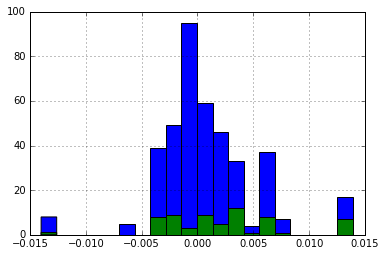

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.figure()
t0_mp = clean_df[clean_df['topic'] == 0]['Mean Proportion']
t1_mp = clean_df[clean_df['topic'] > 0]['Mean Proportion']
t1_mp.hist(bins=20)
t0_mp.hist(bins=20)

In [80]:
ttest_ind(t0_mp, t1_mp, equal_var=False)

Ttest_indResult(statistic=2.2121271738416119, pvalue=0.029911714941695495)

In [81]:
clean_df['movement_label'] = (clean_df['Mean Proportion'] > 0).apply(int)

/Users/Jon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
top1 = clean_df[clean_df['topic'] == 0]
new_vect = CountVectorizer(stop_words='english')
top1_bvect = new_vect.fit_transform(top1['Body'])
X_train, X_test, y_train, y_test = train_test_split(top1_bvect.todense(), top1['movement_label'])

In [84]:
cos_dist = 1 - cosine_similarity(top1_vect.todense())
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
pos = mds.fit_transform(cos_dist)# shape (n_components, n_samples)

distance_df = pd.DataFrame(pos, columns=['x', 'y'])
distance_df['movement_label'] = top1['movement_label']
p = Scatter(distance_df, x='x', y='y', title="MDS: White House Post Titles", color='movement_label',
           legend="top_right")

show(p)

In [91]:
log_reg = LogisticRegressionCV(Cs=100)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.3125